In [49]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bf = pd.read_csv(r"\\msfs-03.grove.ad.uconn.edu\home\cib17001\Downloads\brownfat.csv")

In [5]:
bf.head()

,Id,Sex,Diabetes,Age,Day,Month,Ext_Temp,X2D_Temp,X3D_Temp,X7D_Temp,...,Glycemy,LBW,Cancer_Status,Cancer_Type,BrownFat,Total_vol,Cervical_vol,Mediastinal_vol,Paravertebral_vol,Perirenal_vol
0,2,1,0,52,3,January,-5.9,-3.3,-3.07,-7.29,...,5.5,43.26,0,0,0,0.0,0.0,0.0,0.0,0.0
1,3,2,0,69,3,January,-5.9,-3.3,-3.07,-7.29,...,4.8,65.58,0,0,0,0.0,0.0,0.0,0.0,0.0
2,4,2,0,55,3,January,-3.8,-3.3,-3.07,-7.29,...,6.1,66.34,1,2,0,0.0,0.0,0.0,0.0,0.0
3,6,1,0,54,3,January,-1.3,-3.3,-3.07,-7.29,...,5.7,44.93,1,1,0,0.0,0.0,0.0,0.0,0.0
4,7,2,0,45,3,January,-1.3,-3.3,-3.07,-7.29,...,5.3,78.83,0,0,0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Boxplot of Total volume of Brown Fat by Season')

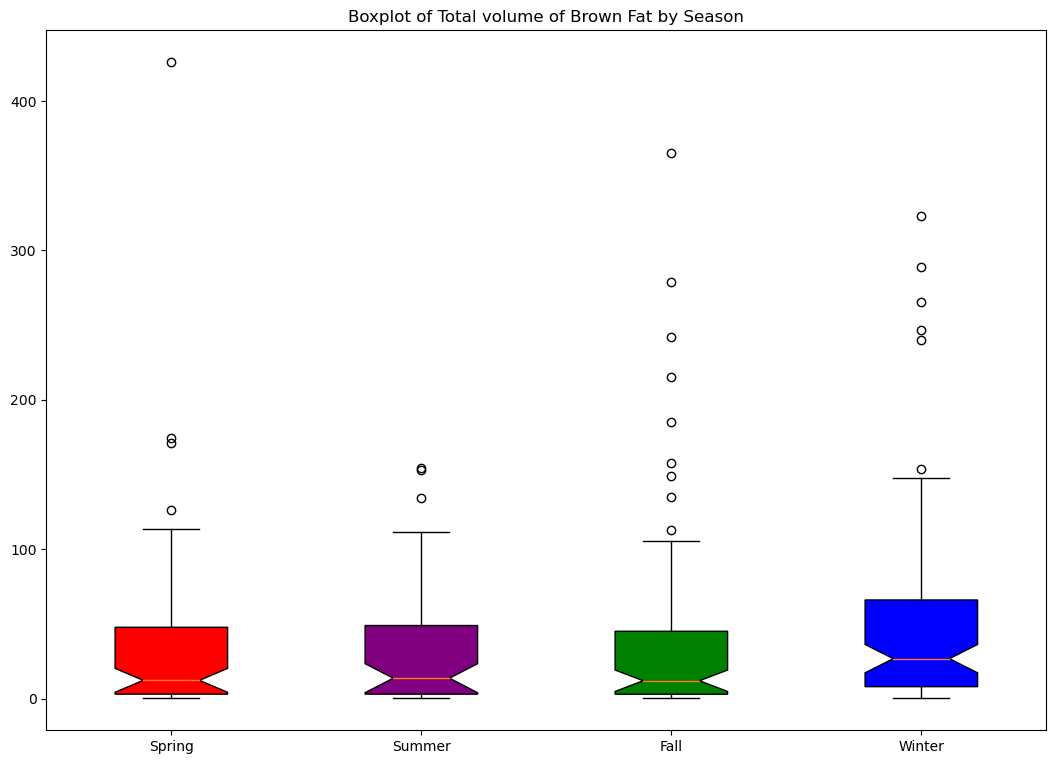

In [132]:
# Creating a Boxplot
# ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

spring = bf.loc[np.where((bf['Season'] == 1) & (bf['Total_vol'] > 0))]
summer = bf.loc[np.where((bf['Season'] == 2) & (bf['Total_vol'] > 0))]
fall = bf.loc[np.where((bf['Season'] == 3) & (bf['Total_vol'] > 0))]
winter = bf.loc[np.where((bf['Season'] == 4) & (bf['Total_vol'] > 0))]

data = [spring['Total_vol'], summer['Total_vol'], fall['Total_vol'], winter['Total_vol']]

fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, patch_artist='True', notch = 'True')
colors = ['red', 'purple', 'green', 'blue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Spring', 'Summer',
                    'Fall', 'Winter'])
plt.title("Boxplot of Total volume of Brown Fat by Season")

In [111]:
# summer and winter df's with only (Total_vol > 0) rows

winter_index = np.where((bf['Season'] == 4) & (bf['Total_vol'] > 0))

summer_index = np.where((bf['Season'] == 2) & (bf['Total_vol'] > 0))

winter_df = bf.loc[winter_index]

summer_df = bf.loc[summer_index]

Text(0.5, 1.0, 'Histogram of Total Volume of Brown Fat for Winter in Individuals Who Have Brown Fat')

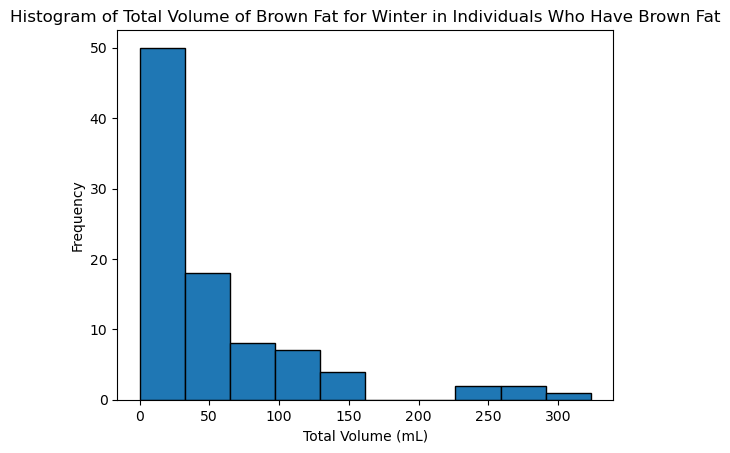

In [108]:
plt.hist(winter_df['Total_vol'], edgecolor='black')
plt.xlabel('Total Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Volume of Brown Fat for Winter in Individuals Who Have Brown Fat')

Text(0.5, 1.0, 'Histogram of Total Volume of Brown Fat for Summer in Individuals Who Have Brown Fat')

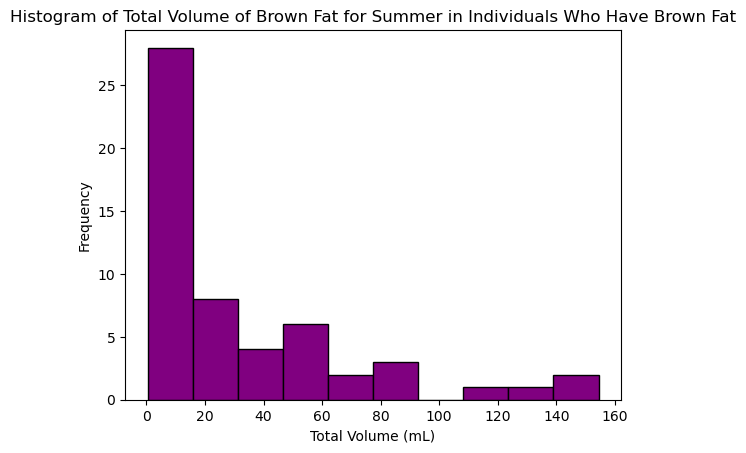

In [109]:
plt.hist(summer_df['Total_vol'], color = 'purple', edgecolor='black')
plt.xlabel('Total Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Volume of Brown Fat for Summer in Individuals Who Have Brown Fat')

In [112]:
# Applying Box Cox Transformation to df's to get normal distribution of data

winter_fit, winter_lambda = stats.boxcox(winter_df['Total_vol'])

summer_fit, summer_lambda = stats.boxcox(summer_df['Total_vol'])

# sns.distplot(winter_fit, hist=False, kde=True)

Text(0.5, 1.0, 'Histogram of Transformed Winter Data')

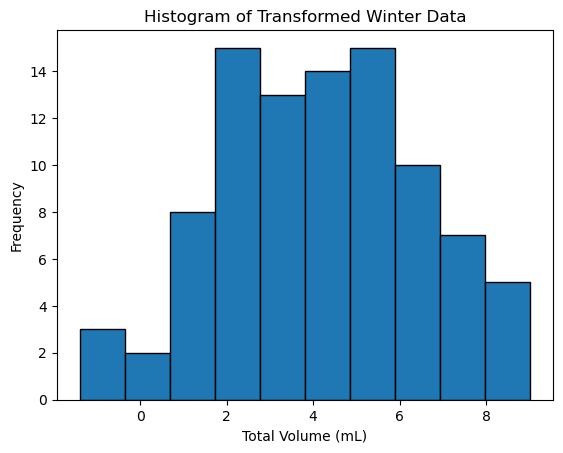

In [113]:
plt.hist(winter_fit, edgecolor='black')
plt.xlabel('Total Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Winter Data')

Text(0.5, 1.0, 'Histogram of Transformed Summer Data')

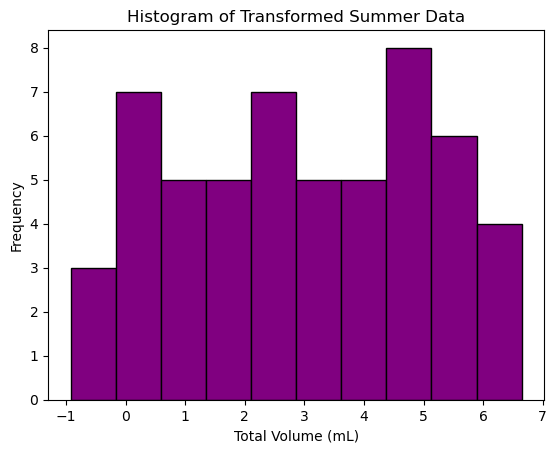

In [114]:
plt.hist(summer_fit, color = 'purple', edgecolor='black')
plt.xlabel('Total Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Summer Data')

In [119]:
# Using Shapiro-wilk Test to check for Normality (Winter)
stats.shapiro(winter_fit)

ShapiroResult(statistic=0.9904986023902893, pvalue=0.7546620965003967)

In [120]:
# Using Shapiro-wilk Test to check for Normality (Winter)
stats.shapiro(summer_fit)

ShapiroResult(statistic=0.964680016040802, pvalue=0.10565075278282166)

In [115]:
# t test to test mean volume of brown fat between winter and summer groups

stats.ttest_ind(winter_fit, summer_fit)

Ttest_indResult(statistic=3.0220237222528183, pvalue=0.002969318665785274)